In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.drop('Id',axis = 1,inplace = True)

In [5]:
train['YearBuilt'] = train['YearBuilt'].astype('O')

###### Handling missing values

In [6]:
train.isna().sum()[train.isna().sum().values>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
train[train.describe().T.index].isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

###### Only 2 numerical variables have null values. Lets handle them first.

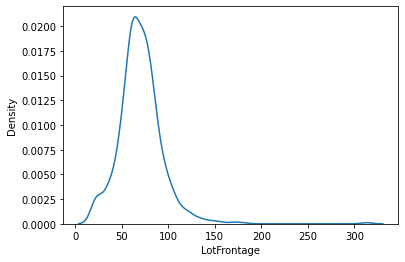

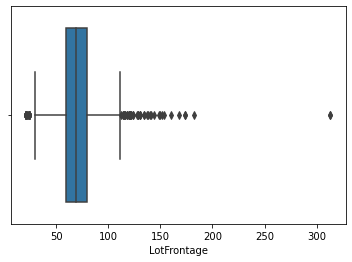

(nan, 1.0)
From the observations it is clear that while the data is normally distributed, it is riddled with outliers.


In [8]:
sns.kdeplot(train['LotFrontage'])
plt.show()
sns.boxplot(train['LotFrontage'])
plt.show()
print(stats.shapiro(train['LotFrontage'].values))
print('From the observations it is clear that while the data is normally distributed, it is riddled with outliers.')

###### Let us check how much does this variable contribute to predicting the price

In [9]:
stats.f_oneway(train.loc[train['LotFrontage'].dropna().index]['SalePrice'].values,train.loc[train['LotFrontage'].dropna().index]['LotFrontage'].values)

F_onewayResult(statistic=5639.4713972978225, pvalue=0.0)

There is some level of predictive power since the pvalue is less than 0.05

In [10]:
np.min(train['LotFrontage']),np.max(train['LotFrontage'])

(21.0, 313.0)

In [11]:
train['LotFrontage'].fillna(train['LotFrontage'].mode().values[0],inplace = True)
train['GarageYrBlt'].fillna(method = 'bfill',inplace = True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mode().values[0],inplace = True)

###### Handled missing values for all numerical variables

In [12]:
train[train.describe().T.index].isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [13]:
(train.isna().sum()[train.isna().sum().values>0]/1460)*100

Alley           93.767123
MasVnrType       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

###### As can be seen in the above table it is better to drop Alley, PoolQC,Fence,MiscFeature from the dataset

In [14]:
train.drop(['Alley','PoolQC','Fence','MiscFeature'],axis = 1,inplace = True)
test.drop(['Alley','PoolQC','Fence','MiscFeature'],axis = 1,inplace = True)

###### There are a lot of missing variables in our categorical features. 1st let us look at the percentage of values that are nan. If it is more than 60% we will drop the column

In [15]:
(train.isna().sum()[train.isna().sum().values>0]/1460)*100

MasVnrType       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

###### Let us handle the missing values for the rest of the features.

In [16]:
train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [17]:
#imputing the median
train['FireplaceQu'].fillna(method = 'bfill',inplace = True)
train['MasVnrType'].fillna(method = 'bfill',inplace = True)

In [18]:
(train.isna().sum()[train.isna().sum().values>0]/1460)*100

BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
FireplaceQu     0.136986
GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

###### For the rest of the dataset, we will impute the mode since not much of this data is missing.

In [19]:
for i in ((train.isna().sum()[train.isna().sum().values>0]/1460)*100).index:
    train[i].fillna(train[i].mode()[0],inplace = True)

# Now there are no missing values in the dataset.

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   object 
 18  YearRemo

###### We will be considering the SalePrice as our target variable. Let us now perform some statistical techniques and EDA over the dataset.

###### Univariate Analysis

In [21]:
int_vars = train.dtypes[train.dtypes == 'int64'].index
float_vars = train.dtypes[train.dtypes == 'float64'].index

###### Looking at the distributions of all the int variables

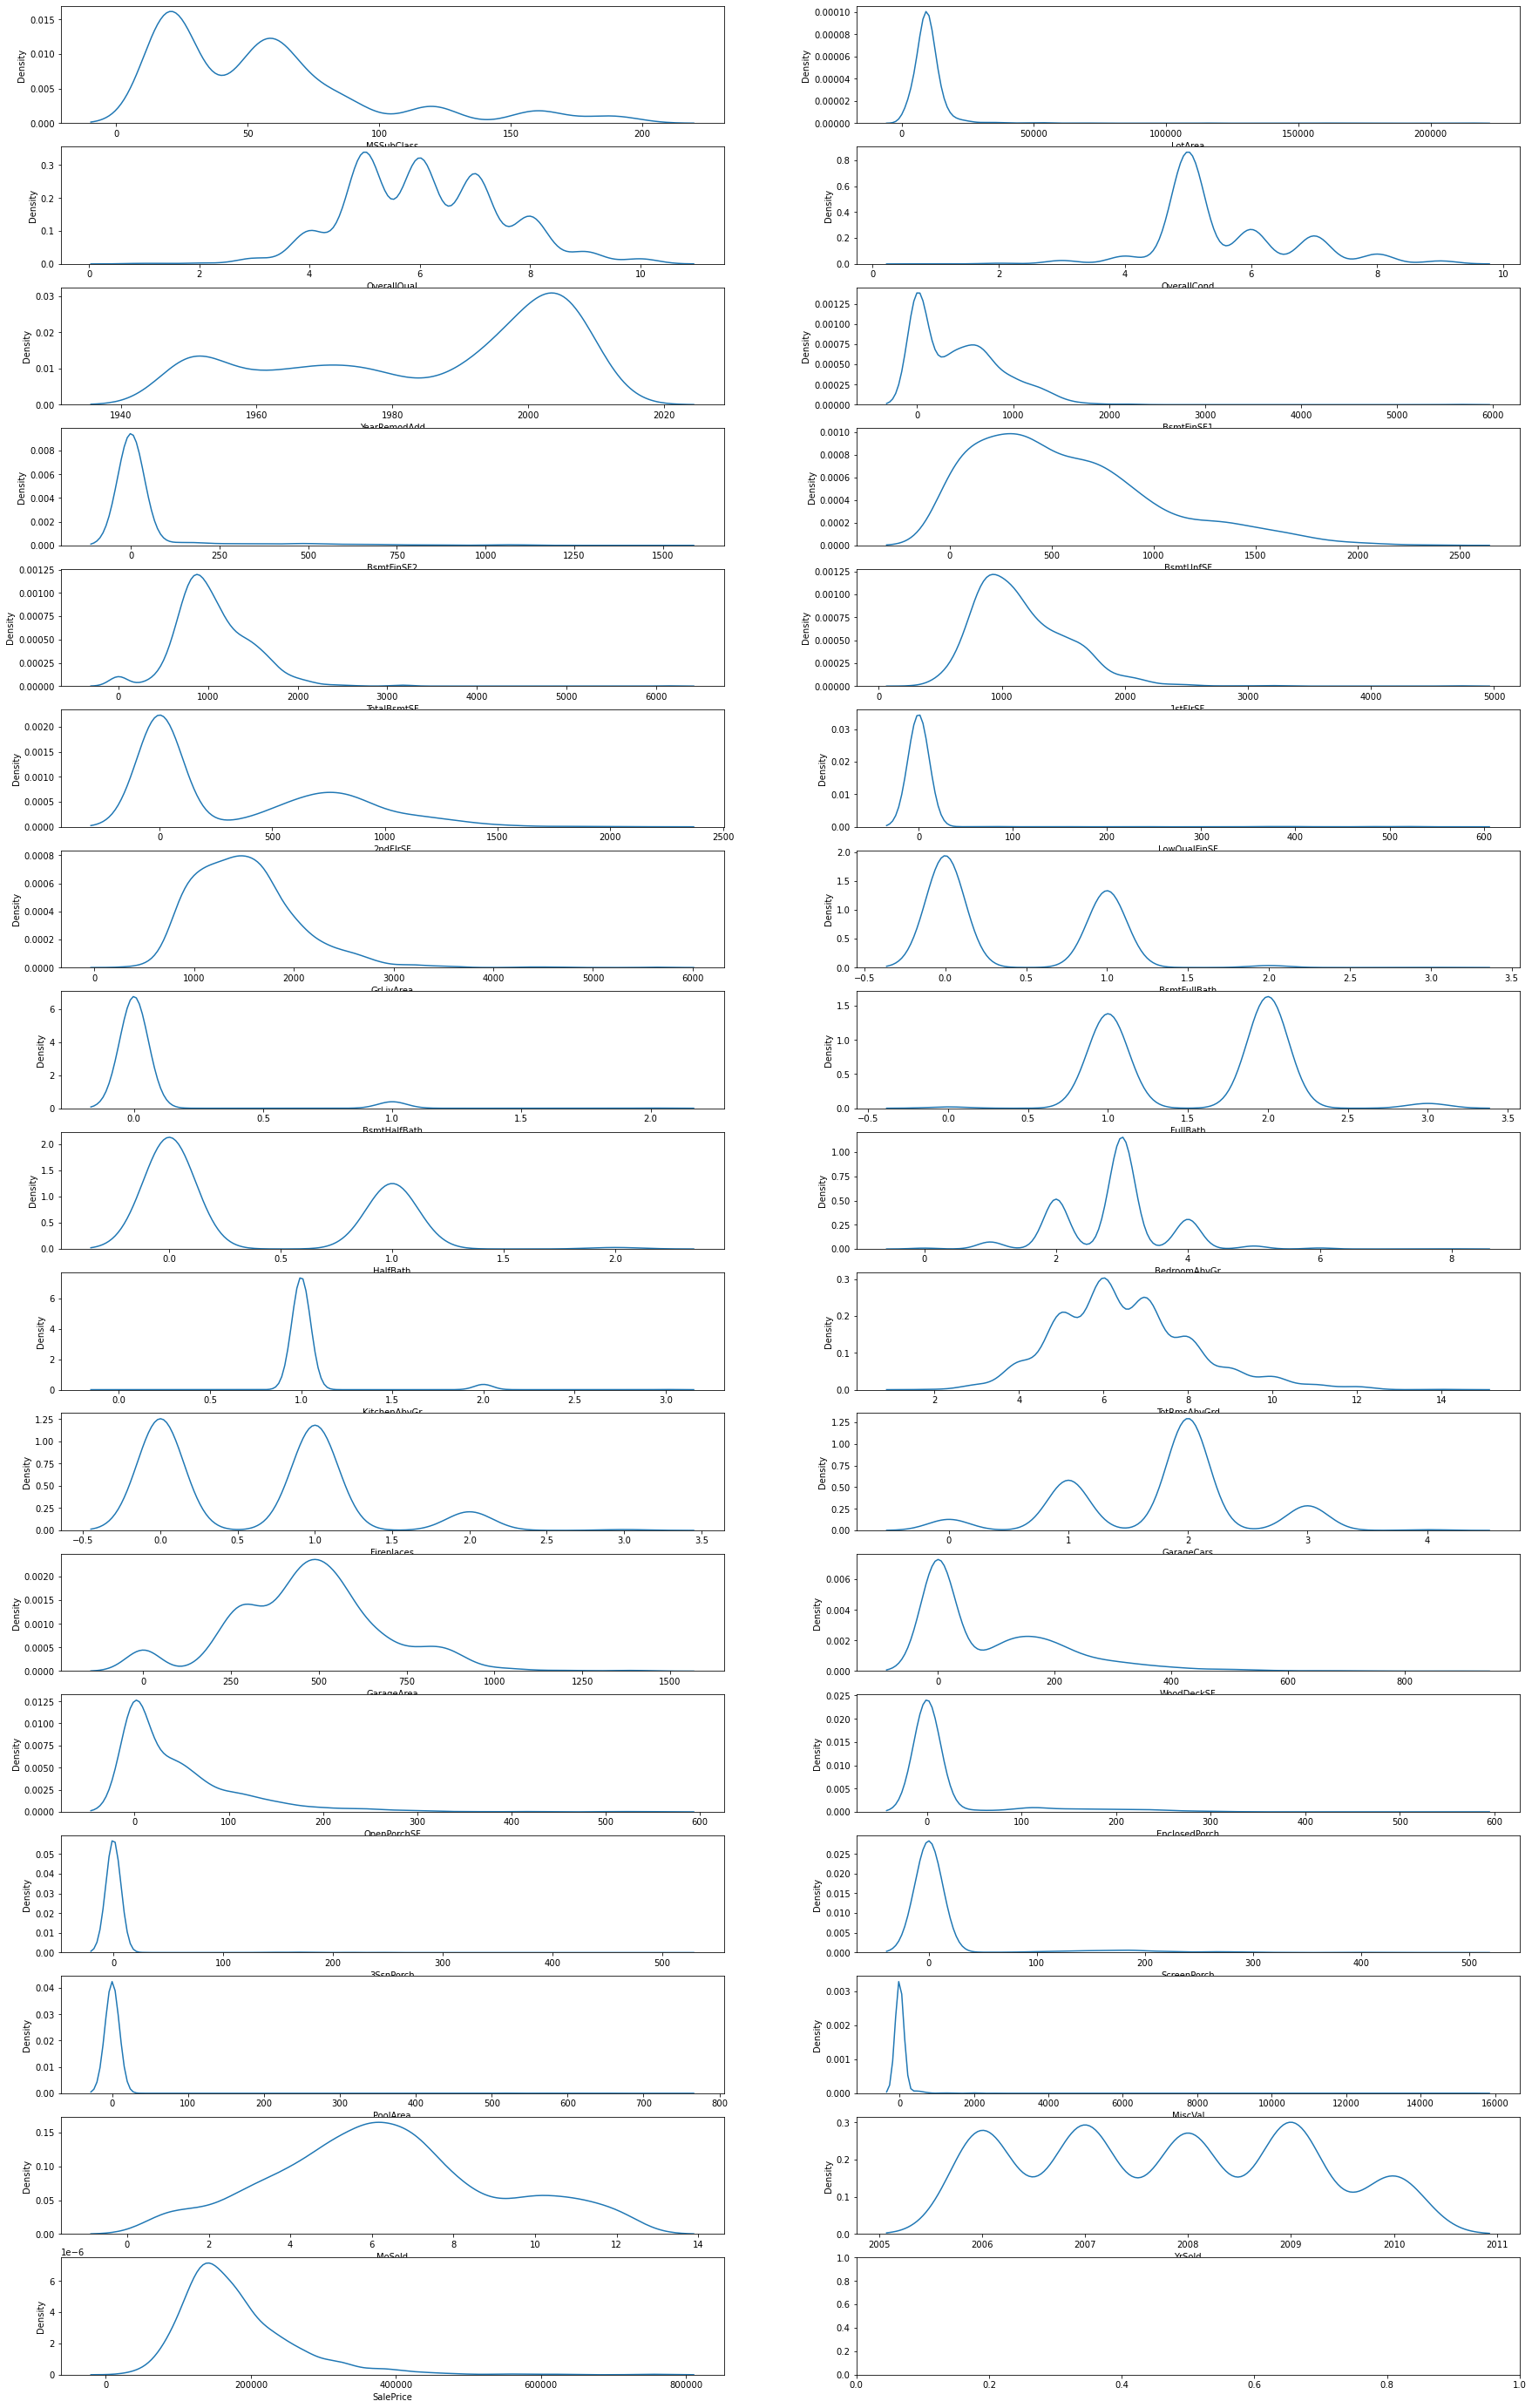

In [22]:
j = 0
fig,ax = plt.subplots(nrows = 17,ncols = 2,figsize = (30,50))
for i in range(17):
    for k in range(2):
        if j <=len(int_vars)-1:
            sns.kdeplot(int_vars[j],data = train,ax = ax[i,k])
            j+=1
        else:
            pass

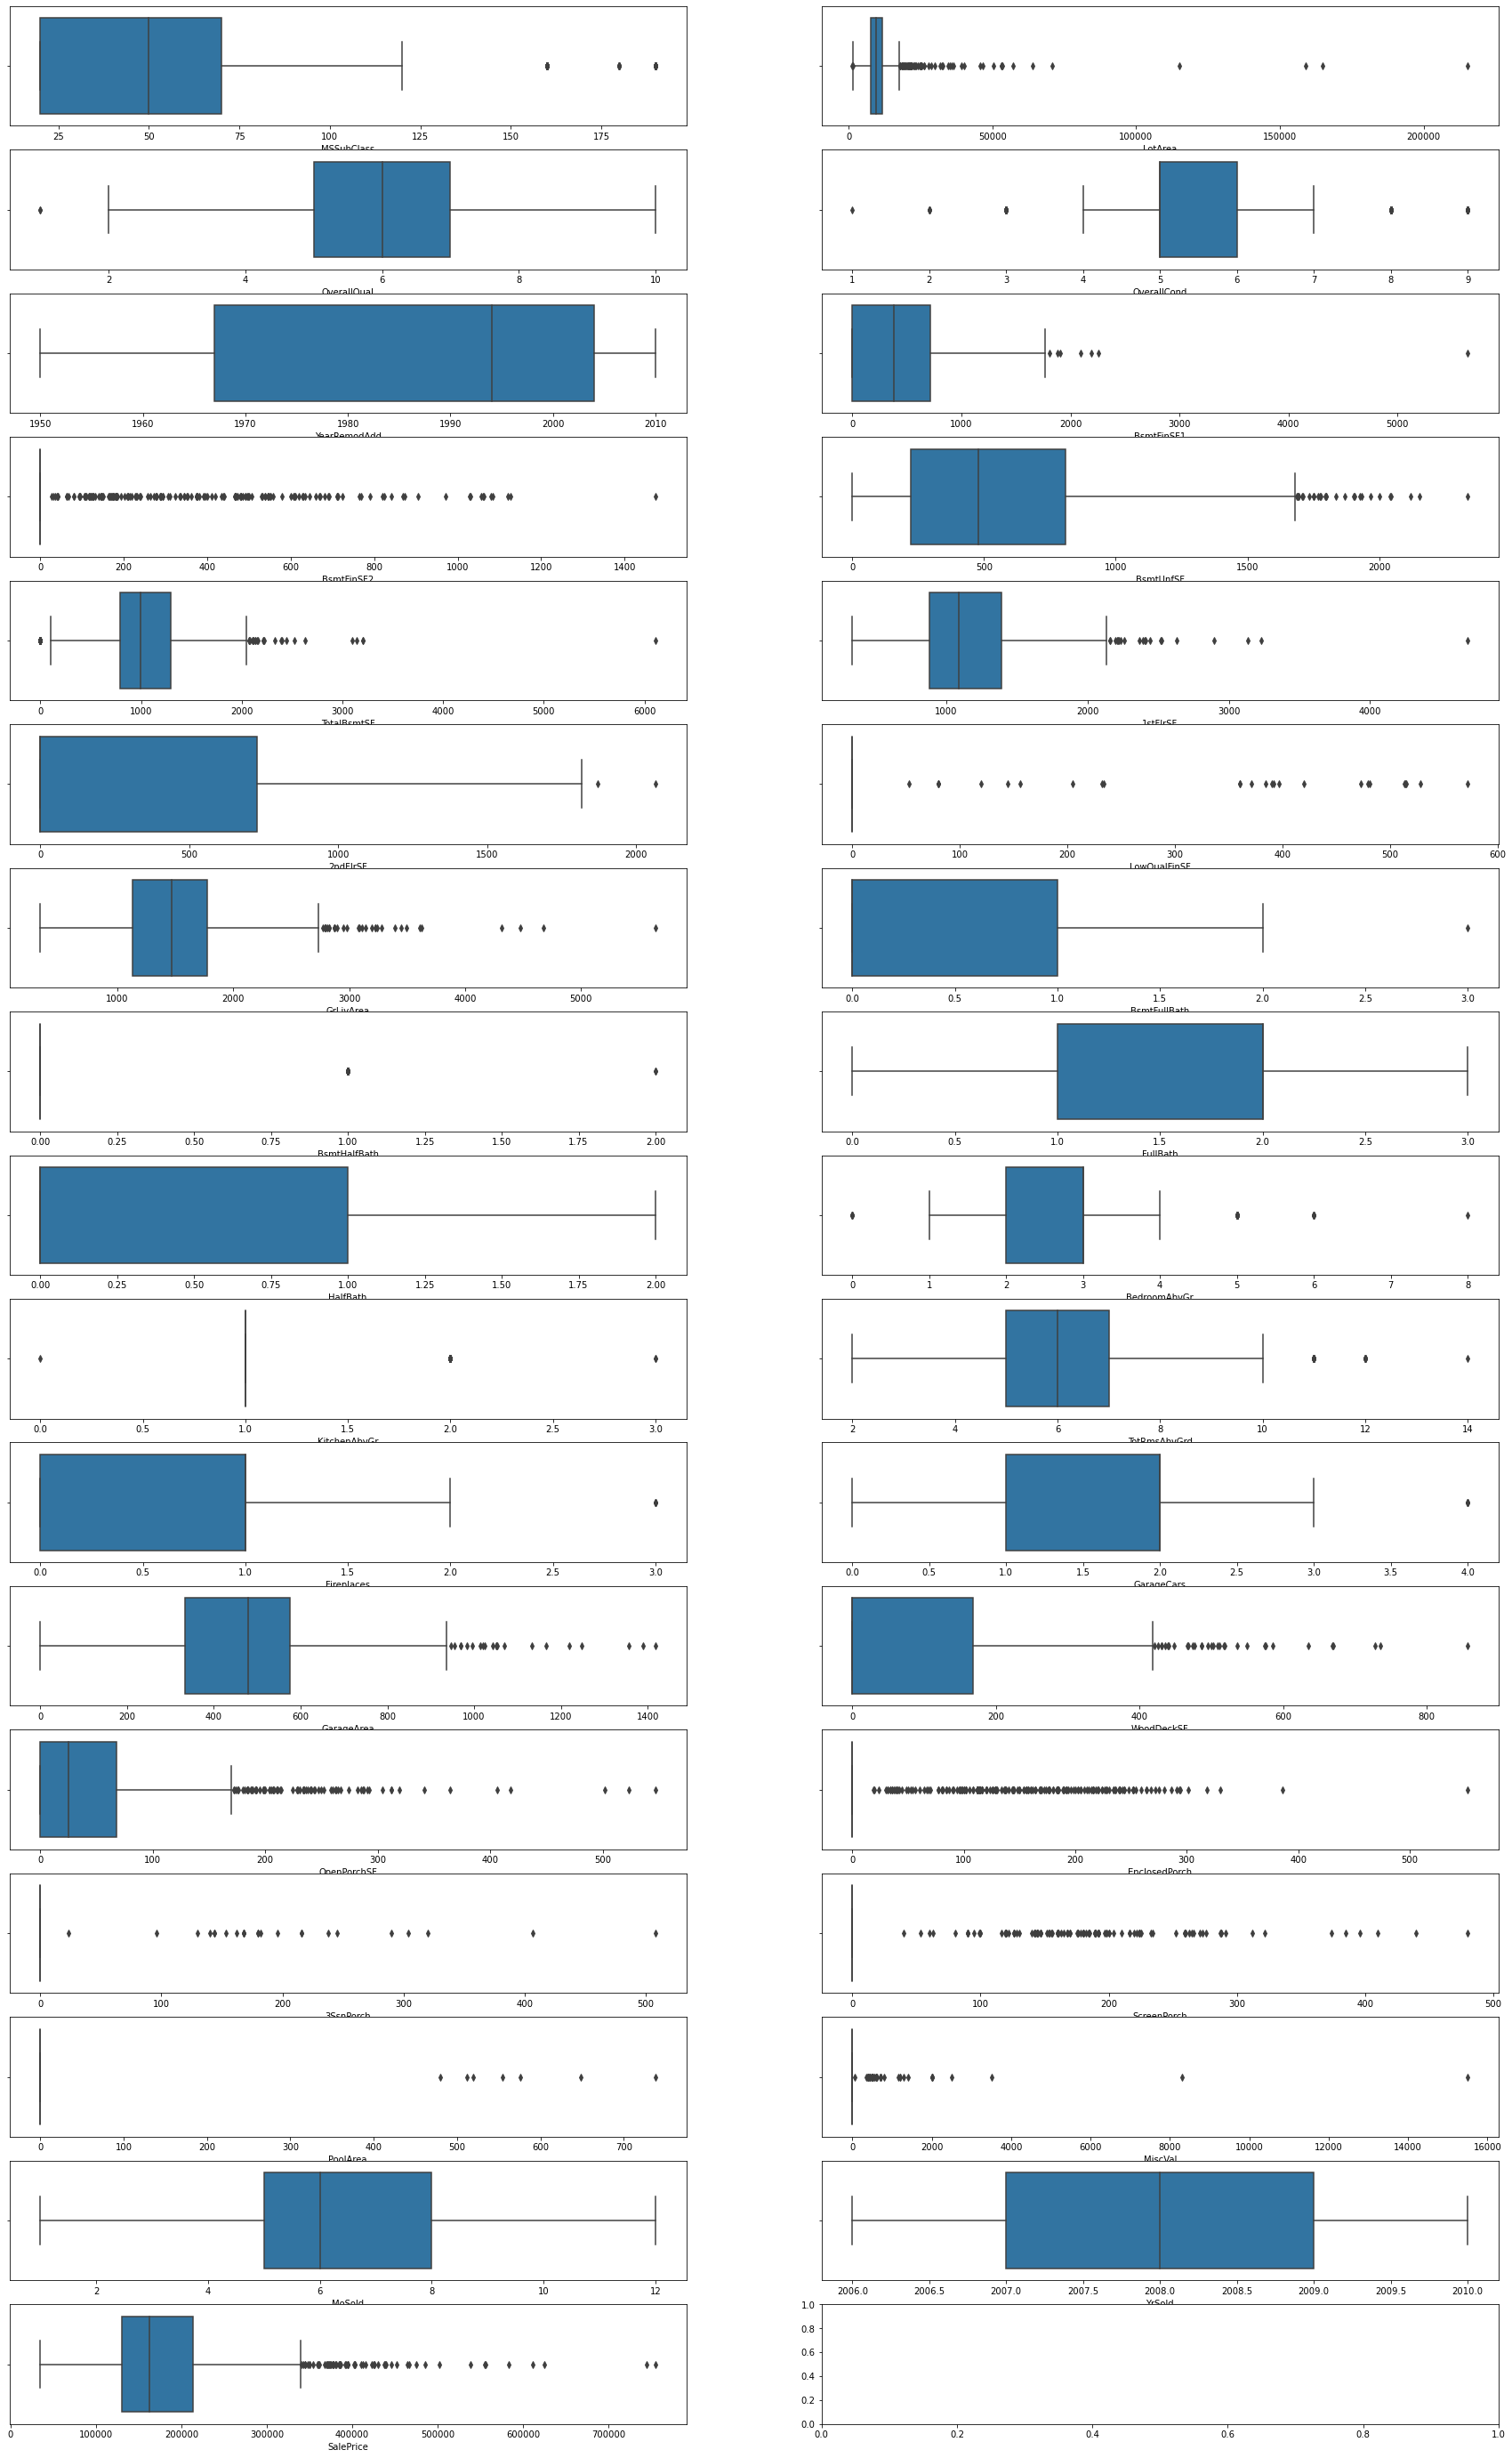

In [23]:
j = 0
fig,ax = plt.subplots(nrows = 17,ncols = 2,figsize = (30,50))
for i in range(17):
    for k in range(2):
        if j <=len(int_vars)-1:
            sns.boxplot(int_vars[j],data = train,ax = ax[i,k])
            j+=1
        else:
            pass

###### Many of the features seem to present outliers in our dataset. I also see that some variables that are categorized as numeric should be categorical since they have limited number of levels.

###### Bivariate Analysis

In [24]:
int_vars

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

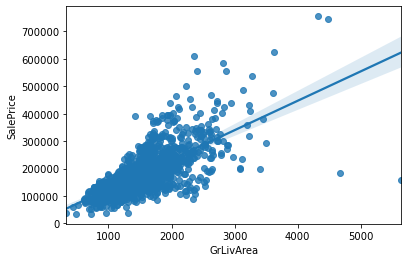

In [25]:
sns.regplot(train['GrLivArea'],train['SalePrice'])

###### Multivariate Analysis

###### Day 1

* Implementing what was taught to us on 12th Jan OLS and simple linear regression

In [26]:
data = train[['GrLivArea','SalePrice']]

In [27]:
data['GrLivArea'].describe((0.75,0.25))

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [28]:
Q3 = 1776.75
Q1 = 1129.50
IQR = Q3-Q1
Q3+(1.5*IQR)

2747.625

In [29]:
data = data[data['GrLivArea']<2747.625]

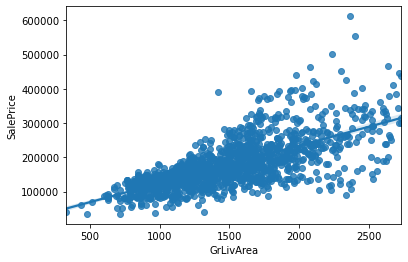

In [30]:
sns.regplot(data['GrLivArea'],data['SalePrice'])
plt.show()

In [31]:
stats.linregress(data)

LinregressResult(slope=110.24969020808584, intercept=13902.684567572462, rvalue=0.6961617671437162, pvalue=1.18000507909121e-207, stderr=3.009608941307214)

In [32]:
stats.ttest_ind(train['GrLivArea'],train['SalePrice'])

Ttest_indResult(statistic=-86.28798430215092, pvalue=0.0)

In [33]:
data.corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.696162
SalePrice,0.696162,1.000000


###### Manual Calculation of coefficients beta0,beta1 ie. slope and intercept

###### Slope

In [34]:
xbar = np.mean(data.GrLivArea)
ybar = np.mean(data.SalePrice)

xixbar = data.GrLivArea - xbar
yiybar = data.SalePrice - ybar

In [35]:
a = sum(xixbar*yiybar)
a

31870709761.30162

In [36]:
b = sum((data.GrLivArea-xbar)**2)
b

289077544.8089578

In [37]:
slope = a/b
slope

110.24969020808572

###### Intercept

In [38]:
intercept = ybar-slope*xbar
intercept

13902.684567572636

In [39]:
stats.linregress(data)

LinregressResult(slope=110.24969020808584, intercept=13902.684567572462, rvalue=0.6961617671437162, pvalue=1.18000507909121e-207, stderr=3.009608941307214)

In [40]:
ypred = intercept + (slope *data.GrLivArea)
ypred

0       202429.654823
1       153037.793610
2       210808.631279
3       203201.402655
4       256231.503645
            ...      
1455    195483.924340
1456    242450.292369
1457    271886.959654
1458    132751.850612
1459    152376.295469
Name: GrLivArea, Length: 1429, dtype: float64

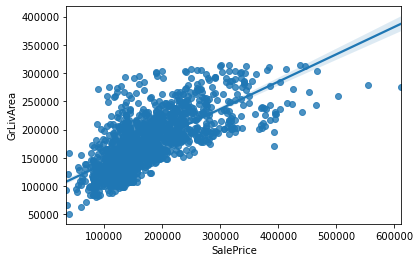

In [41]:
sns.regplot(data.SalePrice,ypred)
plt.show()

In [42]:
model = ols("SalePrice~GrLivArea",data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1342.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          1.18e-207
Time:                        18:00:23   Log-Likelihood:                -17521.
No. Observations:                1429   AIC:                         3.505e+04
Df Residuals:                    1427   BIC:                         3.506e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.39e+04   4646.010      2.992      0.003    4788.941     2.3e+04
GrLivArea    110.2497      3.010     36.633      0.000     104.346     116.153
==============================================================================
Omnibus:                      266.428   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1098.437
Skew:                           0.839   Prob(JB):                    3.00e-239
Kurtosis:                       6.954   Cond. No.                     5.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [44]:
np.sqrt(mean_squared_error(data.SalePrice,ypred))

51134.39469987204

###### Day 2

In [45]:
# SSR,SST,SSE 

In [46]:
stats.linregress(data)

LinregressResult(slope=110.24969020808584, intercept=13902.684567572462, rvalue=0.6961617671437162, pvalue=1.18000507909121e-207, stderr=3.009608941307214)

In [47]:
ypred = stats.linregress(data).intercept + (stats.linregress(data).slope * data['GrLivArea'])

In [48]:
TSS = sum((np.mean(data['SalePrice'])-data['SalePrice'])**2)
TSS

7250179791064.891

In [49]:
SSR = sum((np.mean(data['SalePrice'])-ypred)**2)
SSR

3513735877895.325

In [50]:
SSE = sum((data['SalePrice']-ypred)**2)
SSE

3736443913169.568

In [51]:
rsq = 1 - (SSE/TSS)
rsq

0.48464120603266214

In [52]:
model.rsquared

0.4846412060326619

In [53]:
n = data.shape[0]
p = data.shape[1]-1
a = n-p-1
b = n-1
r = 1-rsq
AdjRsq =(r*b)/a
1-AdjRsq

0.484280057613624

In [54]:
model.rsquared_adj

0.4842800576136238

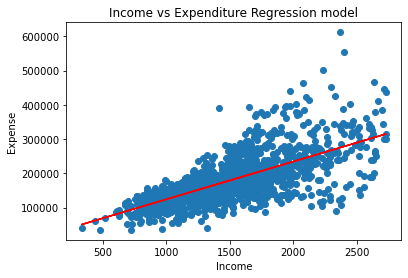

In [55]:
#Plot the regression

#Scatter plot
plt.scatter(data['GrLivArea'],data['SalePrice'])

#Regression line
plt.plot(data['GrLivArea'],ypred,color = 'red')

#Aesthetics
plt.xlabel('Income')
plt.ylabel('Expense')
plt.title("Income vs Expenditure Regression model")
plt.show()

In [56]:
# data.columns

In [57]:
data1 = train[['GrLivArea','MSSubClass','LotFrontage','LotArea','SalePrice']]

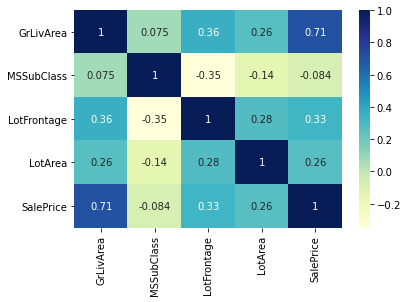

In [58]:
sns.heatmap(data1.corr(),annot = True,cmap = "YlGnBu")

In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols("SalePrice~MSSubClass+GrLivArea",data = data1).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     792.7
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          1.12e-233
Time:                        18:00:24   Log-Likelihood:                -18007.
No. Observations:                1460   AIC:                         3.602e+04
Df Residuals:                    1457   BIC:                         3.603e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.096e+04   4688.866      6.602      0.000    2.18e+04    4.02e+04
MSSubClass  -259.3598     34.144     -7.596      0.000    -326.336    -192.383
GrLivArea    108.6932      2.749     39.546      0.000     103.302     114.085
==============================================================================
Omnibus:                      260.694   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3699.332
Skew:                           0.374   Prob(JB):                         0.00
Kurtosis:                      10.762   Cond. No.                     5.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
MSE = np.mean(m.resid**2)
MSE

3020235302.216619

In [61]:
RMSE = np.sqrt(MSE)
RMSE

54956.667495551614

In [62]:
MAE = np.mean(abs(m.resid))

In [63]:
MAE

37368.714505124284

In [64]:
#predictors and target
X = data1.drop('SalePrice',axis = 1)
y = data1['SalePrice']

In [65]:
#Random Forest model
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X,y)
pred_rf = clf.predict(X)
clf.score(X,y)
#Model has overfit in this case

0.9336019514866807

In [66]:
MSE = np.mean((y-pred_rf)**2)
MSE

418758454.4532712

In [67]:
RMSE = np.sqrt(MSE)
RMSE

20463.588503810155

In [68]:
MAE = np.mean(abs(y-pred_rf))
MAE

11681.61840150032

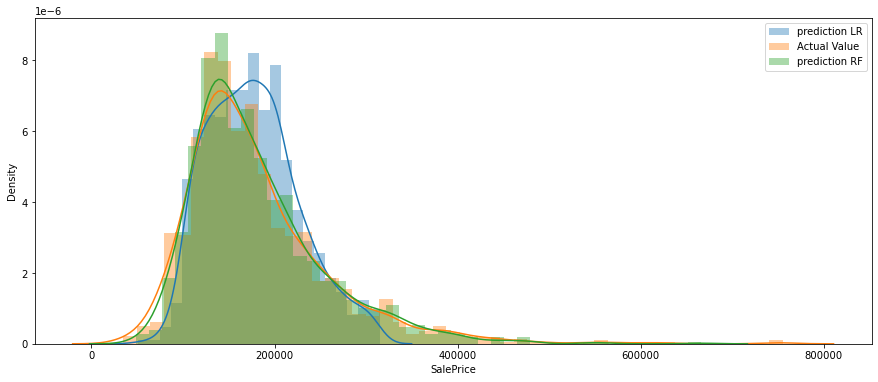

In [69]:
plt.figure(figsize = (15,6))
sns.distplot(ypred,label = 'prediction LR')
sns.distplot(y,label = 'Actual Value')
sns.distplot(pred_rf,label = 'prediction RF')
plt.legend()
plt.show()

### Day 3

In [73]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [75]:
model = ols("SalePrice~GrLivArea+MSSubClass+LotFrontage+LotArea",data = data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     401.7
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          3.25e-233
Time:                        18:03:32   Log-Likelihood:                -18001.
No. Observations:                1460   AIC:                         3.601e+04
Df Residuals:                    1455   BIC:                         3.604e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.478e+04   6224.236      3.981      0.000    1.26e+04     3.7e+04
GrLivArea     105.0661      3.069     34.240      0.000      99.047     111.085
MSSubClass   -227.2530     37.368     -6.082      0.000    -300.554    -153.952
LotFrontage    72.7675     76.178      0.955      0.340     -76.662     222.197
LotArea         0.4641      0.153      3.032      0.002       0.164       0.764
==============================================================================
Omnibus:                      268.152   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4830.050
Skew:                           0.288   Prob(JB):                         0.00
Kurtosis:                      11.892   Cond. No.                     6.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
RMSE = np.sqrt(np.mean(model.resid**2))
MAE = np.mean(abs(model.resid))
RMSE,MAE

(54744.82471577775, 37004.27055870635)

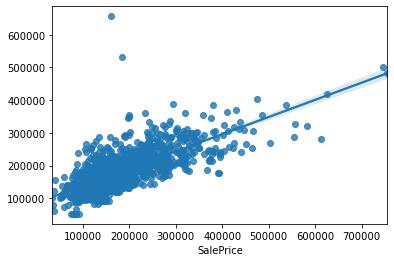

In [84]:
from sklearn.linear_model import LinearRegression
X = data1.drop('SalePrice',axis = 1)
y = data1.SalePrice
lr = LinearRegression()
lr.fit(X,y)
pred = lr.predict(X)
sns.regplot(y,pred)
plt.show()

In [101]:
m1 = ols("SalePrice~GrLivArea",data = data).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1342.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          1.18e-207
Time:                        18:14:42   Log-Likelihood:                -17521.
No. Observations:                1429   AIC:                         3.505e+04
Df Residuals:                    1427   BIC:                         3.506e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.39e+04   4646.010      2.992      0.003    4788.941     2.3e+04
GrLivArea    110.2497      3.010     36.633      0.000     104.346     116.153
==============================================================================
Omnibus:                      266.428   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1098.437
Skew:                           0.839   Prob(JB):                    3.00e-239
Kurtosis:                       6.954   Cond. No.                     5.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
stats.linregress(data)

LinregressResult(slope=110.24969020808584, intercept=13902.684567572462, rvalue=0.6961617671437162, pvalue=1.18000507909121e-207, stderr=3.009608941307214)

In [104]:
predict = stats.linregress(data).intercept + (stats.linregress(data).slope * data['GrLivArea'])

In [150]:
SSR = sum((np.mean(data.SalePrice)-predict)**2)
p = 1
n = data.shape[0]
SSE =  sum((data.SalePrice-predict)**2)
MSR = SSR/p
MSE = SSE/(n-p-1)
Fstat = MSR/MSE
print('F-stat :',Fstat)
fpval = 1-(stats.f.cdf(Fstat,p,(n-p-1))) #Dont multiply by 2 since it is known to be a right tailed test.
print('pval(F):',fpval)

F-stat : 1341.944697760295
pval(F): 1.1102230246251565e-16


In [151]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     401.7
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          3.25e-233
Time:                        18:32:51   Log-Likelihood:                -18001.
No. Observations:                1460   AIC:                         3.601e+04
Df Residuals:                    1455   BIC:                         3.604e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.478e+04   6224.236      3.981      0.000    1.26e+04     3.7e+04
GrLivArea     105.0661      3.069     34.240      0.000      99.047     111.085
MSSubClass   -227.2530     37.368     -6.082      0.000    -300.554    -153.952
LotFrontage    72.7675     76.178      0.955      0.340     -76.662     222.197
LotArea         0.4641      0.153      3.032      0.002       0.164       0.764
==============================================================================
Omnibus:                      268.152   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4830.050
Skew:                           0.288   Prob(JB):                         0.00
Kurtosis:                      11.892   Cond. No.                     6.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### Performing the 5 tests for linear regression
* Linearity
* Normality
* Heteroskedasticity
* Multicollinearity
* Auto-Correlation

###### Linearity

In [154]:
sm.stats.diagnostic.linear_rainbow(model) #pval greater than 0.05. Data is linear.

(0.9506895135292064, 0.7523147719444925)

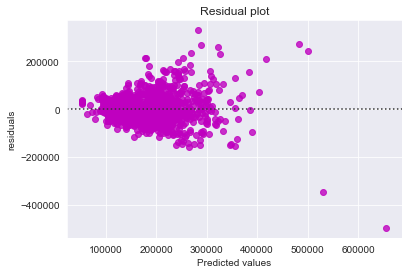

In [160]:
pred = model.fittedvalues
residuals = model.resid
sns.set_style('darkgrid')
sns.residplot(pred,residuals,color = 'm')
plt.title('Residual plot')
plt.ylabel('residuals')
plt.xlabel('Predicted values')
plt.show()

###### Normality

In [166]:
#If data is less than 5000 rows, use Shapiro else if rows greater than 5000 use Jarque Bera test
print("Shapiro stats:",stats.shapiro(model.resid)) # Since our p-value is less than 0.05, reject the null. Our data is not normally distributed so this test fails.
print("Jarque Bera stats: ",stats.jarque_bera(model.resid)) #Jarque Bera is not good for such less data.

Shapiro stats: (0.9065125584602356, 5.252415403632313e-29)
Jarque Bera stats:  (4830.050426484618, 0.0)


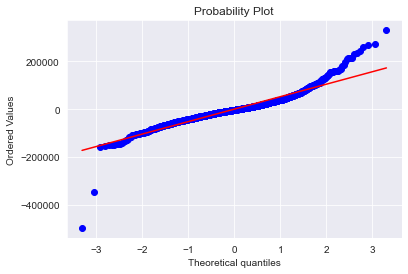

While most of the data seems to follow the line, there are a few data points that deviate. Need to remove the outliers here.


In [172]:
from scipy.stats import probplot
probplot(model.resid,plot = plt)
plt.show()
print('While most of the data seems to follow the line, there are a few data points that deviate. Need to remove the outliers here.')

###### Collinearity

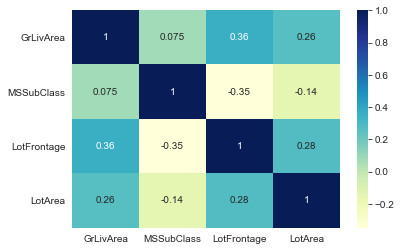

In [175]:
sns.heatmap(data1.drop('SalePrice',axis =1).corr(),annot = True,cmap = "YlGnBu")
plt.show()

In [198]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = data1.drop('SalePrice',axis  =1)
mylist = []
for i in range(x.shape[1]):
    mylist.append(vif(x.values,i))
pd.DataFrame({'Features':x.columns,'VIF':mylist}) #There is high collinearity due to GrLivArea and LotFrontage. We 
# Should get rid of these parameters. How ever R square must also agree with us. If not, check other parameters as well.

,Features,VIF
0,GrLivArea,10.666799
1,MSSubClass,2.538567
2,LotFrontage,8.390904
3,LotArea,2.389467


In [199]:
newmodel = ols("SalePrice~GrLivArea+MSSubClass",data = data1).fit()
newmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     792.7
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          1.12e-233
Time:                        18:50:37   Log-Likelihood:                -18007.
No. Observations:                1460   AIC:                         3.602e+04
Df Residuals:                    1457   BIC:                         3.603e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.096e+04   4688.866      6.602      0.000    2.18e+04    4.02e+04
GrLivArea    108.6932      2.749     39.546      0.000     103.302     114.085
MSSubClass  -259.3598     34.144     -7.596      0.000    -326.336    -192.383
==============================================================================
Omnibus:                      260.694   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3699.332
Skew:                           0.374   Prob(JB):                         0.00
Kurtosis:                      10.762   Cond. No.                     5.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""